In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Looks like the top selling products are Fresh, Milk and Groceries. Numbers are expenditure of clients in monetary units

## Descriptive Statistics

## 1-1

In [3]:
df = pd.read_csv('wholesale.csv')
print (df.head(5) , "\n")
print ((df.sum() / df.sum().sum()) * 100)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

Channel              0.003981
Region               0.007653
Fresh               36.112841
Milk                17.442869
Grocery             23.928007
Frozen               9.244453
Detergents_Paper     8.671360
Delicassen           4.588836
dtype: float64


## 1-2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## 1-3

<Figure size 432x504 with 0 Axes>

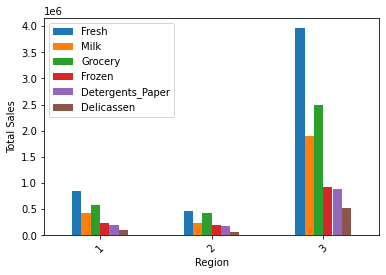

In [5]:
plt.figure(figsize=(6,7))
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().plot(kind='bar')
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show();

## 1-4

In [6]:
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().sum(axis=1) / df.sum().sum() * 100

Region
1    16.324329
2    10.635843
3    73.028194
dtype: float64

## 1-5

In [7]:
df.groupby('Channel')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().sum(axis=1) / df.sum().sum() * 100

Channel
1    54.712120
2    45.276246
dtype: float64

## 1-6

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

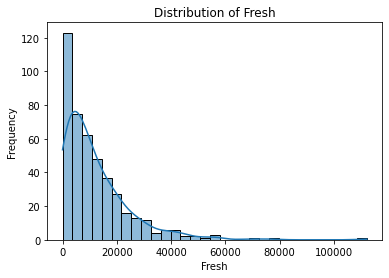

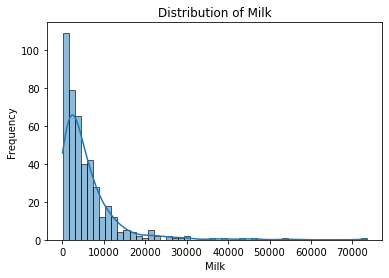

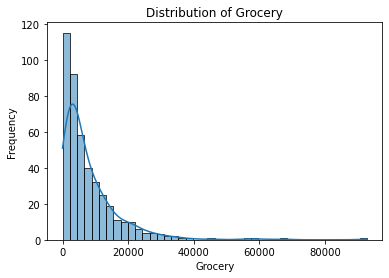

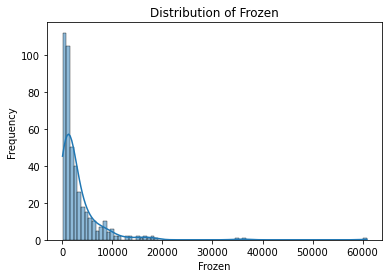

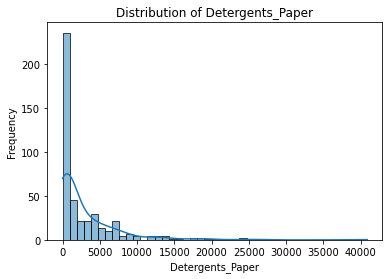

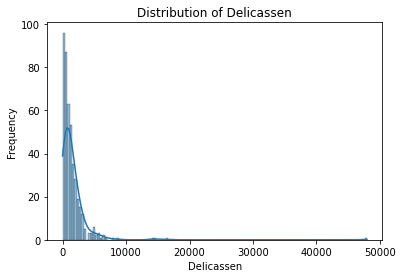

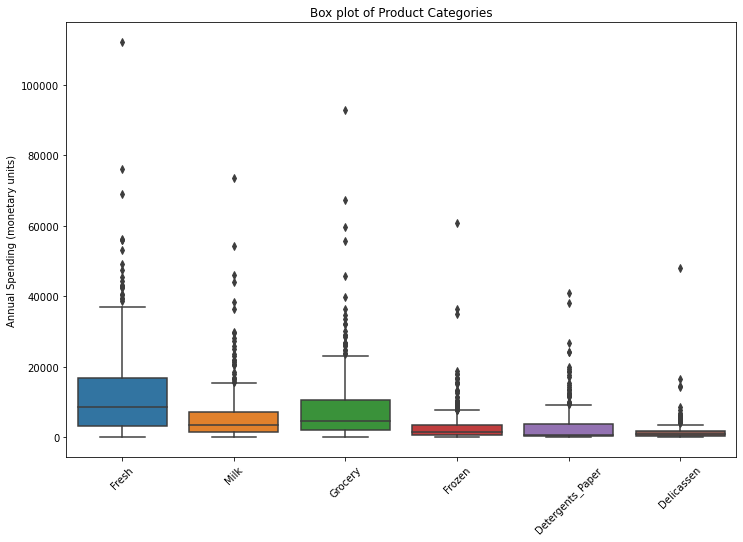

In [8]:
# Basic descriptive statistics for each category
print(df.describe())

# Visualize the distribution of each category with histograms
for column in df.columns[2:]:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for each category to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 2:])
plt.title('Box plot of Product Categories')
plt.ylabel('Annual Spending (monetary units)')
plt.xticks(rotation=45)
plt.show()

## Probability

## 1-7

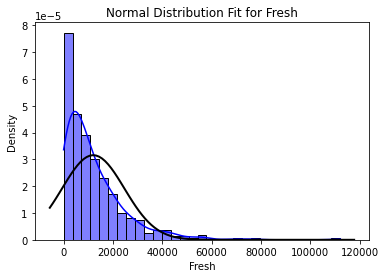

Normal Fit for Fresh: Mean = 12000.3, Std = 12632.95


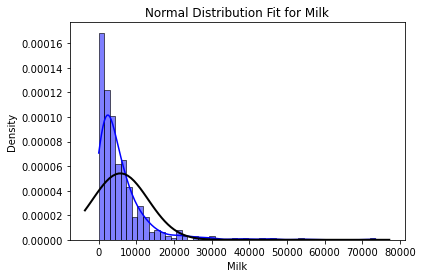

Normal Fit for Milk: Mean = 5796.27, Std = 7371.99


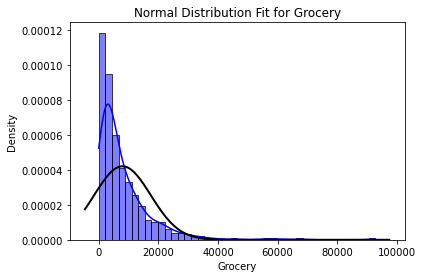

Normal Fit for Grocery: Mean = 7951.28, Std = 9492.36


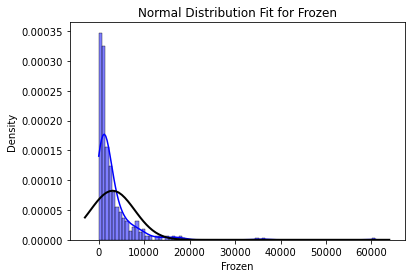

Normal Fit for Frozen: Mean = 3071.93, Std = 4849.15


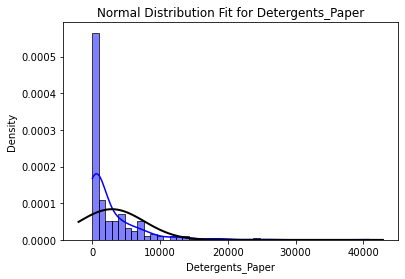

Normal Fit for Detergents_Paper: Mean = 2881.49, Std = 4762.43


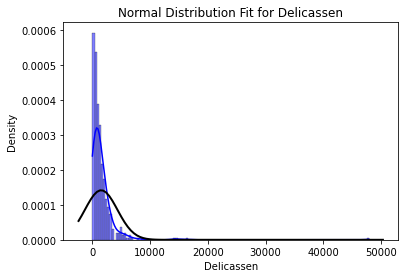

Normal Fit for Delicassen: Mean = 1524.87, Std = 2816.9
Expected number of purchases (lambda) for 'Frozen': 3071.93


In [9]:
# Normal Distribution Fit
for column in df.columns[2:]:
    mu, std = stats.norm.fit(df[column])
    plt.figure()
    sns.histplot(df[column], kde=True, stat='density', color='blue')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Normal Distribution Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    print(f"Normal Fit for {column}: Mean = {round(mu, 2)}, Std = {round(std, 2)}")

## Poisson Distribution for 'Frozen'
lambda_frozen = df['Frozen'].mean()
print(f"Expected number of purchases (lambda) for 'Frozen': {round(lambda_frozen, 2)}")

## 1-8

T-test for 'Fresh' between Channels 1 and 2: T-stat=3.59, P-value=0.0


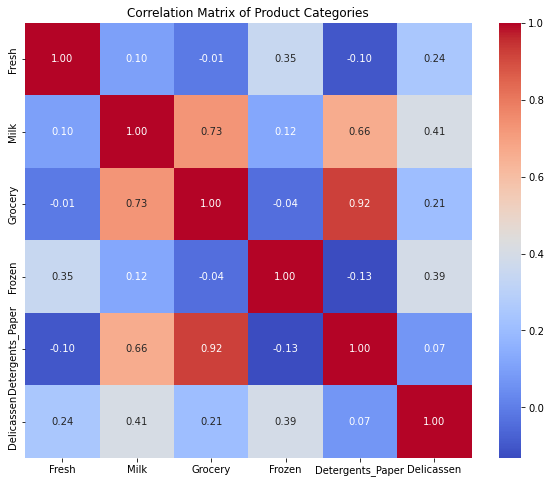

In [10]:
# Comparing the mean spending on 'Fresh' between two channels
t_stat, p_val = stats.ttest_ind(df[df['Channel'] == 1]['Fresh'], df[df['Channel'] == 2]['Fresh'])
print(f"T-test for 'Fresh' between Channels 1 and 2: T-stat={round(t_stat, 2)}, P-value={round(p_val, 2)}")

## Correlations Between Categories
# Heatmap of Pearson correlation coefficients between product categories
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Product Categories')
plt.show()



***Observations:***
- We can see that there is a high correlation  between groceries, detergents and milk. While Groceries has a negative(very low) correlation with frozen and fresh food

## Sampling Distributions

### Studying the confidence interval of the major products consumed

## 1-9

In [11]:
df_products =  df.drop(columns=['Channel', 'Region'], axis= 1)

## 1-10

In [12]:
df_products.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

## 1-11

In [13]:
def confidence_evaluation(df):
    num_columns = len(df.columns)
    fig, axs = plt.subplots(num_columns, 2, figsize=(10, num_columns*5)) # Adjust figsize as needed

    for idx, column in enumerate(df.columns):
        mean = np.mean(df[column])
        standard_deviation = np.std(df[column])
        shape_df = df[column].shape[0]

        # Calculating the Gamma distribution parameter
        variance_gamma = standard_deviation**2
        k_gamma = mean**2 / variance_gamma # Shape
        theta_gamma = variance_gamma / mean # Scale

        # Preparing plot data
        x = np.linspace(0, 150, 10000) # Generating linear space
        y = stats.gamma.pdf(x, a=k_gamma, scale=theta_gamma) # Gamma PDF

        # Plotting Gamma PDF
        axs[idx, 0].plot(x, y)
        axs[idx, 0].set_yscale('log')
        axs[idx, 0].set_title(f'{column}, Gamma PDF')
        

        # Simulating samples to estimate the means distribution
        number_samples_per_mean = 50
        num_means = 1000
        means = [np.random.gamma(k_gamma, theta_gamma, number_samples_per_mean).mean() for _ in range(num_means)]

        # Plotting the means distribution
        sns.histplot(means, kde=True, ax=axs[idx, 1]) # KDE for smoothed curve
        axs[idx, 1].set_title(f'{column}, Means Distribution')

        # Calculating the Standard Error and Confidence Intervals
        standard_error = standard_deviation / np.sqrt(shape_df)
        lower = mean - 2*standard_error
        upper = mean + 2*standard_error

        # Print the confidence interval and the mean
        print(f'For {column}: 95% confidence interval = [{round(lower,2)}, {round(upper,2)}], mean = {round(mean,2)}')

        
        

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show();
       

## 1-12

For Fresh: 95% confidence interval = [10795.79, 13204.8], mean = 12000.3
For Milk: 95% confidence interval = [5093.37, 6499.16], mean = 5796.27
For Grocery: 95% confidence interval = [7046.22, 8856.34], mean = 7951.28
For Frozen: 95% confidence interval = [2609.58, 3534.28], mean = 3071.93
For Detergents_Paper: 95% confidence interval = [2427.41, 3335.57], mean = 2881.49
For Delicassen: 95% confidence interval = [1256.29, 1793.45], mean = 1524.87


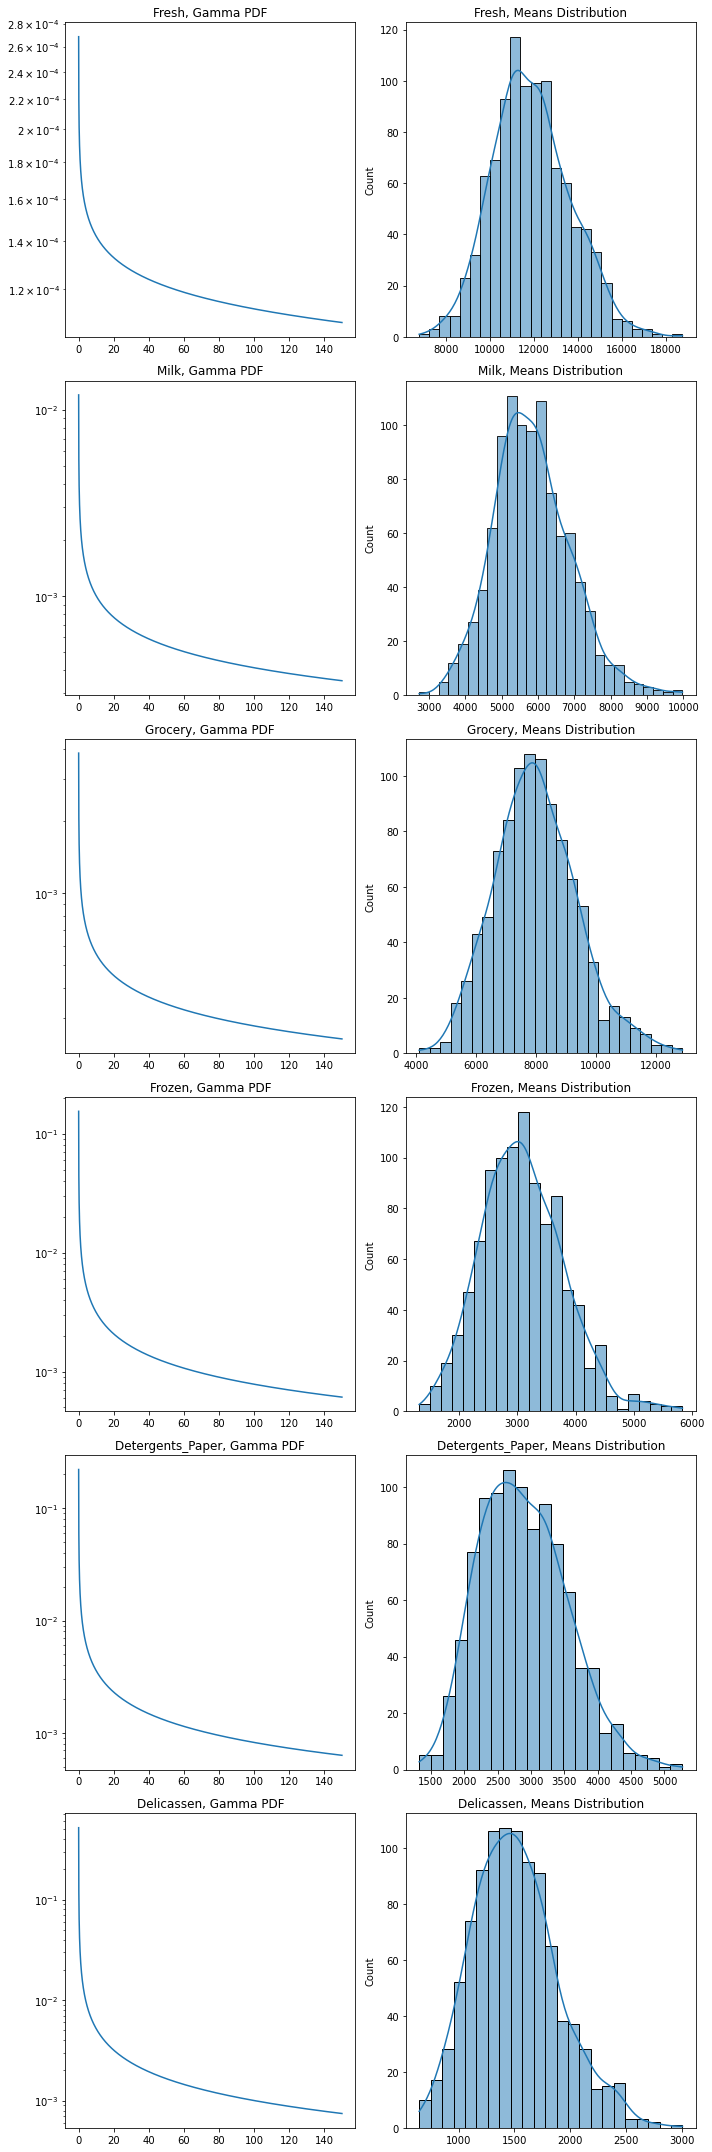

In [14]:
confidence_evaluation(df_products)

### Testing for Independence

## 1-13

$H_0 :$  There's no association between Channel sales and Regions

In [15]:
rowlabel = ['Channel 1', 'Channel 2']

collabel = ['Region 1', 'Region 2', 'Region 3']
# The 'normalize = True' will show proportions (normalized frequencies) so each cell in the table represents the proportion of the total observations
table = pd.crosstab(df['Channel'], df['Region'], margins=False, normalize=False)
table.index = rowlabel
table.columns = collabel
table


,Region 1,Region 2,Region 3
Channel 1,59,28,211
Channel 2,18,19,105


In [16]:
rowlabel = ['Channel 1','Channel 2']
collabel = ['Region 1','Region 2', 'Region 3']
prop = pd.crosstab(df['Channel'], df['Region'], margins = False, normalize= True)
prop.index=rowlabel
prop.columns=collabel
prop

,Region 1,Region 2,Region 3
Channel 1,0.134091,0.063636,0.479545
Channel 2,0.040909,0.043182,0.238636


In [17]:
# Convert the previously created 'table' into a
# 'Table' object from statsmodels.
table = sm.stats.Table(table)

# Print the fitted values of the table. Fitted values in the context of a contingency table
# are the expected frequencies of observations for each cell of the table under the null
# hypothesis of independence between the variables. In other words, it shows what the distribution
# of 'Channel' across 'Region' would look like if there were no association between the two.
print(table.fittedvalues)

# Perform a test for nominal association between 'Channel' and 'Region'. This test evaluates
# whether there is a statistically significant association between the two categorical variables.
# The test used here is likely a Chi-squared test of independence, which is common for this type
# of analysis. The result of this test includes the Chi-squared statistic and the p-value, among
# other details.
X2 = table.test_nominal_association()

print(X2)


           Region 1   Region 2    Region 3
Channel 1     52.15  31.831818  214.018182
Channel 2     24.85  15.168182  101.981818
df          2
pvalue      0.11365689324243589
statistic   4.349142154535748


In [18]:
table.standardized_resids    

,Region 1,Region 2,Region 3
Channel 1,1.838309,-1.264988,-0.684097
Channel 2,-1.838309,1.264988,0.684097


Based on the results for the Chi-squared test, there is no dependence between the channels and the regions. 


p-Val = .099


Chi-squared Statistic: .009


***Sales Startegy:***
- We can execute a sales strategy that is uniform across channel or region. This means that we can design a marketing campaign that is the same across all channels and regions.

## 1-14

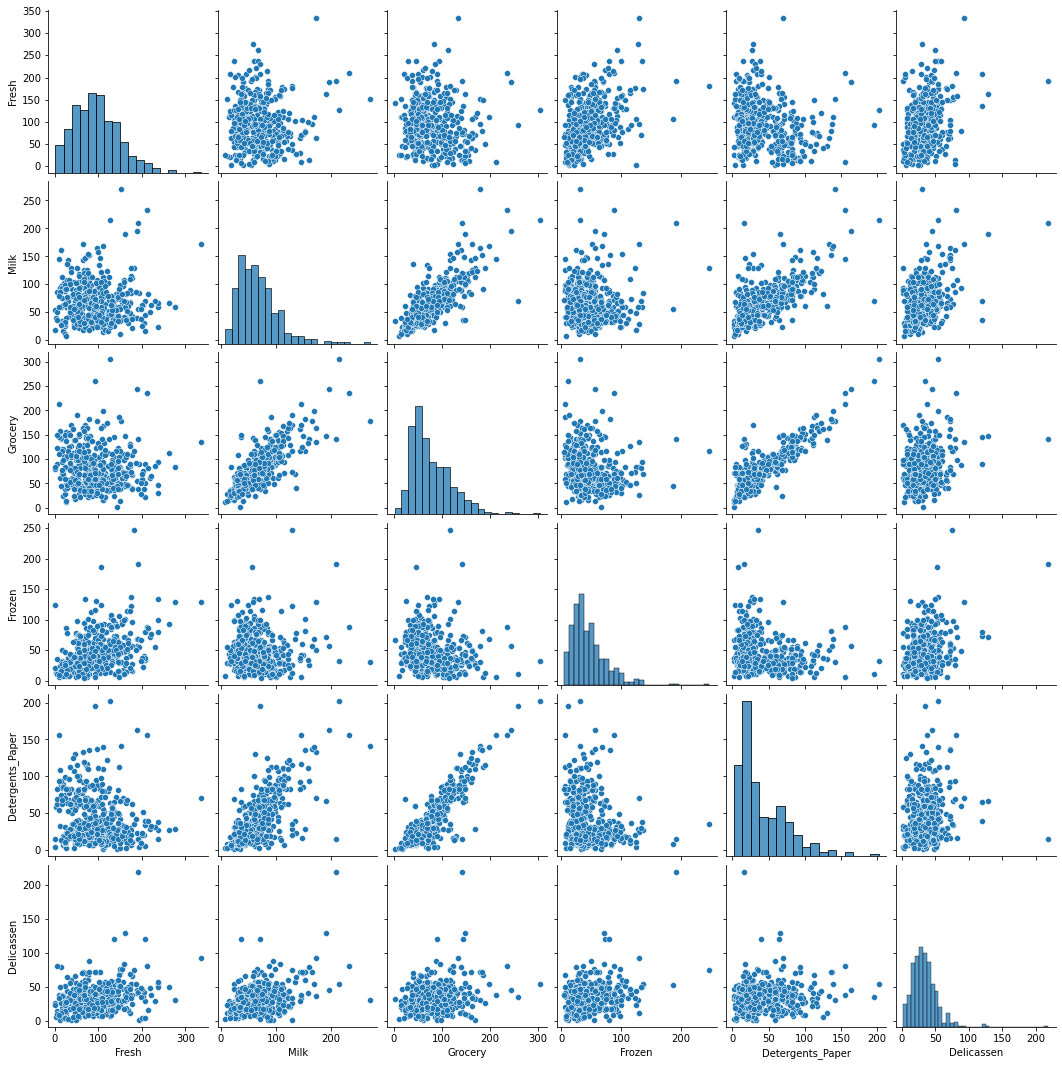

In [19]:
sns.pairplot(data= np.sqrt(df_products))#Plotting several scatter plots to see the correlation between each variable
plt.show();

### Fitting Models for Prediction

In [20]:
import statsmodels.formula.api as smf

## 1-15

In [21]:
fitd2 = smf.ols(formula='Grocery~  Detergents_Paper', data = df).fit()#Fitting a Linear Model  To  Build an equation to predict how much groceries will be bought
print(fitd2.summary())
print(f'AIC: {fitd2.aic}')

                            OLS Regression Results                            
Dep. Variable:                Grocery   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2582.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          9.56e-186
Time:                        10:14:10   Log-Likelihood:                -4229.2
No. Observations:                 440   AIC:                             8462.
Df Residuals:                     438   BIC:                             8471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2640.7728    201.892  

## 1-16

In [22]:
fitd = smf.glm(formula='Grocery~ Detergents_Paper + Milk',family = sm.families.Gamma(link = sm.families.links.identity()) ,data = df_products).fit()#Fitting a Linear Model  To  Build an equation to predict how much groceries will be bought
print(fitd.summary())
print(f'AIC: {fitd.aic}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Grocery   No. Observations:                  440
Model:                            GLM   Df Residuals:                      437
Model Family:                   Gamma   Df Model:                            2
Link Function:               identity   Scale:                         0.30160
Method:                          IRLS   Log-Likelihood:                -4071.8
Date:                Thu, 15 Feb 2024   Deviance:                       124.26
Time:                        10:14:10   Pearson chi2:                     132.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.9289
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1186.4343    113.216  

c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


***Observation:***

Based on the results of our Linear models we see that the result of the test AIC, the Gamma family showed better results in predicting groceries  better than the OLS

## 1-17

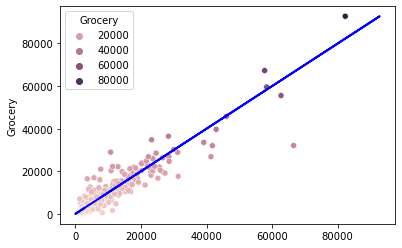

In [23]:
#Checking the predictted values agaisnt the actual points
sns.scatterplot(x = fitd.predict(), y = df_products['Grocery'], hue = df_products['Grocery'])
# line for perfect predictions
plt.plot(df['Grocery'], df['Grocery'], color='blue', linewidth=2)
plt.show()


## 1-18

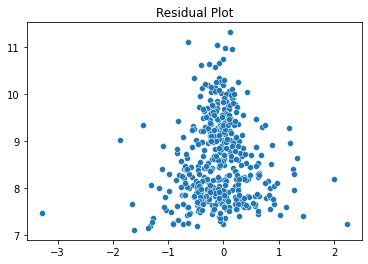

In [24]:
sns.scatterplot(x =fitd.resid_deviance, y = np.log(fitd.fittedvalues))
plt.title('Residual Plot')
plt.show();